# ВЫЧМАТЫ

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import math

# 1. Метод Гаусса

## 1.1. Метод Гаусса с выбором главного элемента по столбцу

При написании программы нельзя использовать готовые функции для матричного умножения и обращения матриц, кроме случаев, когда это явно описано.

Напишите программу для решения линейной системы
$$
Ax = b
$$
методом Гаусса с выбором главного элемента по столбцу.

Требования к программе:

1. Программа должна содержать функцию, принимающую на вход матрицу `A` и правую часть `b`.

2. Внутри функции нужно сначала вычислить матрицы `L`, `U` и матрицу перестановки `P`, соответствующую выбору главного элемента по столбцу (то есть перестановке строк): $PA = LU$.

3. После этого в функции нужно решить системы с треугольными матрицами с помощью прямой и обратной подстановок.

4. Функция должна возвращать матрицы и вектор решения: `L`, `U`, `P`, `x`.

5. Программа должна вызывать реализованную функцию для нескольких матриц и правых частей и выводить норму разницы между полученным решением и решением, которое возвращает готовая библиотечная функция, например, `numpy.linalg.solve`.

In [12]:
def gauss_lu_partial_pivot(A, b, pivoting=True):
    if A.shape[0] != A.shape[1] or A.shape[0] != b.shape[0]:
        raise ValueError('Wrong parameters shape!')

    A = A.copy()
    b = b.copy()
    n = A.shape[0]

    L = np.eye(n, dtype=float)
    U = A.copy()
    P = np.eye(n, dtype=float)

    for k in range(n):
        if pivoting:
            pivot = k + int(np.argmax(np.abs(U[k:, k])))
        else:
            pivot = k
        if U[pivot, k] == 0:
            raise ValueError("Error: Specific Matrix!")

        if pivot != k:
            U[[k, pivot], :] = U[[pivot, k], :]
            b[[k, pivot]] = b[[pivot, k]]
            P[[k, pivot], :] = P[[pivot, k], :]
            L[:, [k, pivot]] = L[:, [pivot, k]]
            L[[k, pivot], :] = L[[pivot, k], :]

        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, :] = U[i, :] - L[i, k] * U[k, :]

    y = np.zeros(n, dtype=float)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]

    x = np.zeros(n, dtype=float)
    for i in reversed(range(n)):
        x[i] = y[i] / U[i, i]
        for j in range(i + 1, n):
            x[i] -= U[i, j] * x[j] / U[i, i]

    return L, U, P, x

In [19]:
A = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 8]], dtype=np.float64)
b = np.array([1, 2, 5], dtype=np.float64)

gauss_lu_partial_pivot(A, b)

[[3. 5. 8.]
 [2. 4. 5.]
 [1. 2. 3.]]
[[3. 5. 8.]
 [2. 4. 5.]
 [1. 2. 3.]]


(array([[1.        , 0.        , 0.        ],
        [0.66666667, 1.        , 0.        ],
        [0.33333333, 0.5       , 1.        ]]),
 array([[ 3.        ,  5.        ,  8.        ],
        [ 0.        ,  0.66666667, -0.33333333],
        [ 0.        ,  0.        ,  0.5       ]]),
 array([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([ 5., -2.,  0.]))

In [31]:
n = 1000
A = np.diag([1.0] * n)
A[0, n - 1] = 1

if n > 1:
    A += np.diag([10] * (n - 1), k=-1)
b = np.array([i for i in range(n)], dtype=np.float64)

gauss_lu_partial_pivot(A, b, False)[-1]

/tmp/ipykernel_18532/753523939.py:30: RuntimeWarning: overflow encountered in multiply
  U[i, :] = U[i, :] - L[i, k] * U[k, :]
/tmp/ipykernel_18532/753523939.py:30: RuntimeWarning: invalid value encountered in multiply
  U[i, :] = U[i, :] - L[i, k] * U[k, :]
/tmp/ipykernel_18532/753523939.py:36: RuntimeWarning: overflow encountered in scalar multiply
  y[i] -= L[i, j] * y[j]
/tmp/ipykernel_18532/753523939.py:36: RuntimeWarning: invalid value encountered in scalar multiply
  y[i] -= L[i, j] * y[j]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [32]:
gauss_lu_partial_pivot(A, b)[-1]

array([ 8.26446281e-02,  1.73553719e-01,  2.64462810e-01,  3.55371901e-01,
        4.46280992e-01,  5.37190083e-01,  6.28099174e-01,  7.19008264e-01,
        8.09917355e-01,  9.00826446e-01,  9.91735537e-01,  1.08264463e+00,
        1.17355372e+00,  1.26446281e+00,  1.35537190e+00,  1.44628099e+00,
        1.53719008e+00,  1.62809917e+00,  1.71900826e+00,  1.80991736e+00,
        1.90082645e+00,  1.99173554e+00,  2.08264463e+00,  2.17355372e+00,
        2.26446281e+00,  2.35537190e+00,  2.44628099e+00,  2.53719008e+00,
        2.62809917e+00,  2.71900826e+00,  2.80991736e+00,  2.90082645e+00,
        2.99173554e+00,  3.08264463e+00,  3.17355372e+00,  3.26446281e+00,
        3.35537190e+00,  3.44628099e+00,  3.53719008e+00,  3.62809917e+00,
        3.71900826e+00,  3.80991736e+00,  3.90082645e+00,  3.99173554e+00,
        4.08264463e+00,  4.17355372e+00,  4.26446281e+00,  4.35537190e+00,
        4.44628099e+00,  4.53719008e+00,  4.62809917e+00,  4.71900826e+00,
        4.80991736e+00,  

In [2]:
def gen_general(size, max_val):
    return (2 * max_val) * np.random.rand(size[0], size[1]) - max_val, (2 * max_val) * np.random.rand(size[1]) - max_val


def test_gauss(t):
    print('Testing Gauss Pivotal method...\n')
    for i in tqdm(range(1, t + 1)):
        n = np.random.randint(1, 1000)
        A_test, b_test = gen_general((n, n), 1e6)

        L, U, P, x_gauss = gauss_lu_partial_pivot(A_test, b_test)
        x_numpy = np.linalg.solve(A_test, b_test)

        error = np.linalg.norm(x_gauss - x_numpy, ord=np.inf)

        print(f"--- Test {i} ---\n--> Size: {n}\n--> Error: {error}\n")


In [4]:
test_gauss(5)

Testing Gauss Pivotal method...



 20%|██        | 1/5 [00:01<00:04,  1.05s/it]

--- Test 1 ---
--> Size: 867
--> Error: 2.327027459614328e-12



 40%|████      | 2/5 [00:01<00:02,  1.18it/s]

--- Test 2 ---
--> Size: 733
--> Error: 1.4908074774666602e-12



 60%|██████    | 3/5 [00:03<00:02,  1.09s/it]

--- Test 3 ---
--> Size: 982
--> Error: 8.174572130315028e-13



100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

--- Test 4 ---
--> Size: 696
--> Error: 4.509971063271223e-09

--- Test 5 ---
--> Size: 34
--> Error: 1.9895196601282805e-13



# 2. Итерационные методы решения линейных систем

## 2.1. Метод Ричардсона

Напишите программу для решения линейной системы с действительной матрицей
$$
Ax = b,\quad A = A^T > 0
$$
итерационным методом Ричардсона.

Требования к программе:

1. Программа должна содержать функцию, которая принимает на вход матрицу `A`, правую часть `b`, итерационный параметр $\tau$, максимальное число итераций и параметр $\mathrm{tol}$, задающий критерий остановки для нормы невязки. Функция должна возвращать приближенное решение $y$ и одномерный массив со значениями нормы невязки на каждой итерации. Остановка должна происходить при $\|r\| < tol$.

2. Программа должна создавать матрицу $A = A^T$ произвольного размера $n > 100$, правую часть `b`.

3. Программа должна вычислять оценку собственных чисел с помощью кругов Гершгорина и вычислять точные собственные числа с помощью готовой функции, например, `numpy.linalg.eigvals`.

4. Программа должна вычислять приближенное решение с помощью реализованной функции при трёх различных значениях итерационного параметра:
   - (a) Произвольное значение из допустимой области
   - (b) Оптимальное значение, вычисленное по оценкам с.ч.
   - (c) Оптимальное значение, вычисленное по точным с.ч.

5. Программа должна выводить норму разницы между тремя приближенными решениями и точным решением, вычисленным с помощью готовой функции, например, `numpy.linalg.solve`.

6. Программа должна выводить время работы готовой функции (с помощью которой вычислялось точное решение) и время работы написанной функции. Для ускорения можно использовать декоратор `@jit` из пакета numba.

7. Программа должна строить графики зависимости логарифма нормы невязки от номера итерации для трёх значений итерационного параметра (на одном рисунке).

8. Автор программы должен уметь объяснить полученные результаты на основе изученной теории.

In [3]:
def richardson(A, b, tau, max_iter=1000, tol=1e-8):
    if A.shape[0] != A.shape[1] or A.shape[0] != b.shape[0]:
        raise ValueError('Wrong parameters shape!')

    x = np.zeros(len(b))
    residuals = []
    for k in range(max_iter):
        r = A @ x - b
        residuals.append(np.linalg.norm(r))
        if residuals[-1] < tol:
            break
        x = x - tau * r

    return x, residuals


def gershgorin_bounds(A):
    if A.shape[0] != A.shape[1]:
        raise ValueError('Wrong parameters shape!')

    lambda_min = float('inf')
    lambda_max = -float('inf')

    for i in range(A.shape[0]):
        center = A[i, i]
        radius = np.sum(np.abs(A[i, :])) - abs(A[i, i])

        left = center - radius
        right = center + radius

        if left < lambda_min:
            lambda_min = left
        if right > lambda_max:
            lambda_max = right

    if lambda_min <= 0:
        lambda_min = 1e-15

    return lambda_min, lambda_max

In [18]:
def gen_symmetric(size, max_val):
    ret_a, ret_b = gen_general(size, max_val)
    return ret_a @ ret_a.T, ret_b * ret_b


def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return end - start, result


def test_richardson():
    print('Testing Richardson Iteration method...\n')
    n = np.random.randint(1, 1000)
    A, b = gen_symmetric((n, n), 1)

    eigenvals = np.linalg.eigvals(A)
    lambda_min_estim, lambda_max_estim = gershgorin_bounds(A)
    lambda_min_exact, lambda_max_exact = np.min(eigenvals), np.max(eigenvals)

    print("--- Eigenvalues ---")
    print(f"--> Gershgorin: min: {lambda_min_estim:.6g}, max: {lambda_max_estim:.6g}")
    print(f"--> Exact:      min: {lambda_min_exact:.6g}, max: {lambda_max_exact:.6g}")

    tau_upper_bound = 2.0 / lambda_max_exact
    tau_anyof = 0.5 * tau_upper_bound
    tau_gersh = 2.0 / (lambda_min_estim + lambda_max_estim)
    tau_exact = 2.0 / (lambda_min_exact + lambda_max_exact)

    print("\n--- Tau:")
    print(f"--> Tau Upper Bound: {tau_upper_bound:.6g}")
    print(f"--> Tau Any of:      {tau_anyof:.6g}")
    print(f"--> Tau Gershgorin:  {tau_gersh:.6g}")
    print(f"--> Tau Exact     :  {tau_exact:.6g}")

    max_iter = 10000
    tol = 1e-1

    time_true, x_true = measure_time(np.linalg.solve, A, b)
    time_anyof, (x_anyof, res_anyof) = measure_time(richardson, A, b, tau_anyof, max_iter, tol)
    time_gersh, (x_gersh, res_gersh) = measure_time(richardson, A, b, tau_gersh, max_iter, tol)
    time_exact, (x_exact, res_exact) = measure_time(richardson, A, b, tau_exact, max_iter, tol)

    err_anyof = np.linalg.norm(x_anyof - x_true)
    err_gersh = np.linalg.norm(x_gersh - x_true)
    err_exact = np.linalg.norm(x_exact - x_true)

    print("\n--- Norm |x_approx - x_true| ---")
    print("Any of:     {:.6e}".format(err_anyof))
    print("Gershgorin: {:.6e}".format(err_gersh))
    print("Exact:      {:.6e}".format(err_exact))

    # 6) Время работы
    print("\n--- Time ---")
    print(f"NumPy:      {time_true:.6f} sec")
    print(f"Any of:     {time_anyof:.6f} sec")
    print(f"Gershgorin: {time_gersh:.6f} sec")
    print(f"Exact:      {time_exact:.6f} sec")

    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(res_anyof), label="Tau Any of")
    plt.plot(np.log10(res_gersh), label="Tau Gershgorin")
    plt.plot(np.log10(res_exact), label="Tau Exact")
    plt.xlabel("Iteration")
    plt.ylabel(rf"$\log_{{10}} ||A x_k - b||$")
    plt.title("Richardson approximation")
    plt.grid(True)
    plt.legend()
    plt.show()

Testing Richardson Iteration method...

--- Eigenvalues ---
--> Gershgorin: min: 1e-15, max: 9290.74
--> Exact:      min: 1.83169e-05, max: 1310.2

--- Tau:
--> Tau Upper Bound: 0.00152648
--> Tau Any of:      0.000763241
--> Tau Gershgorin:  0.000215268
--> Tau Exact     :  0.00152648

--- Norm |x_approx - x_true| ---
Any of:     1.861397e+04
Gershgorin: 1.861600e+04
Exact:      1.861114e+04

--- Time ---
NumPy:      0.027665 sec
Any of:     1.707673 sec
Gershgorin: 1.168289 sec
Exact:      0.345541 sec


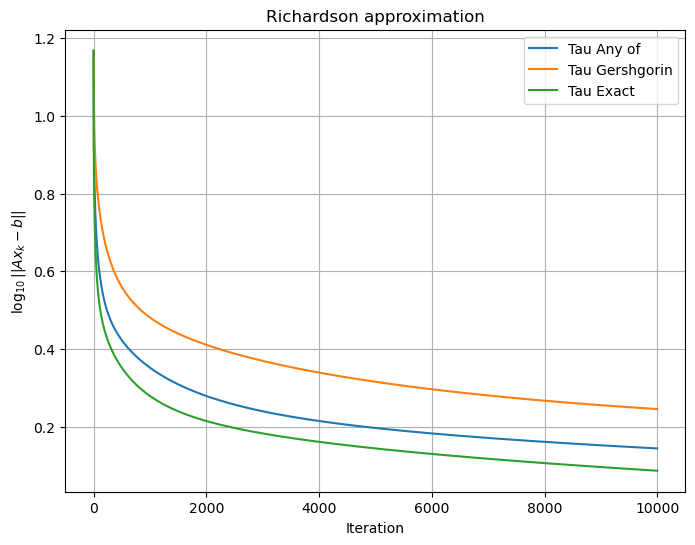

In [19]:
test_richardson()


# 3. Теория приближения функций

## 3.1. Интерполяционный многочлен в форме Ньютона

Написать программу для вычисления интерполяционного многочлена в форме Ньютона и его производной.

Требования к программе:

1. Программа должна содержать функцию, которая принимает на вход массив с координатами узлов `x_0, ..., x_n`, массив значений функции `f(x_0), ..., f(x_n)` в этих узлах, а также массив точек, в которых нужно вычислить значение интерполяционного многочлена и его производной.

   Функция должна вычислять таблицу разделённых разностей, массив значений интерполяционного многочлена в заданных точках и массив значений первой производной интерполяционного многочлена в этих точках. Сложность вычисления одного значения интерполяционного многочлена должна быть $O(n)$, где $n$ — число узлов интерполяции.

2. Программа должна вызывать реализованную функцию для равномерной и чебышёвской сеток и значений какой-то гладкой функции `f` на этих сетках и выводить два рисунка:

   (a) графики функции и многочлена (разными цветами) по значениям на очень подробной сетке, а также точки интерполяции (маркерами);

   (b) графики производной исходной функции $f'$ и производной интерполяционного многочлена $L_n'$ на очень подробной сетке.

In [14]:
def newton_coeffs(x, y):
    n = len(x)
    a = y.copy().astype(float)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            a[i] = (a[i] - a[i - 1]) / (x[i] - x[i - j])
    return a


def eval_newton_and_derivative(a, x_nodes, z):
    n = len(a)
    P = a[-1]
    dP = 0.0

    for i in range(n - 2, -1, -1):
        dP = dP * (z - x_nodes[i]) + P
        P = P * (z - x_nodes[i]) + a[i]
    return P, dP

In [15]:
def interpolate_and_plot(f, fprime, x_nodes, title):
    y_nodes = f(x_nodes)
    a = newton_coeffs(x_nodes, y_nodes)

    z = np.linspace(x_nodes[0], x_nodes[-1], 2000)
    Pz = np.empty_like(z)
    dPz = np.empty_like(z)

    for k, zk in enumerate(z):
        Pz[k], dPz[k] = eval_newton_and_derivative(a, x_nodes, zk)

    plt.figure(figsize=(16, 9))
    plt.plot(z, f(z), label='f(x)')
    plt.plot(z, Pz, '--', label='Newton')
    plt.plot(x_nodes, y_nodes, 'o', label='points')
    plt.title(f'{title}: function')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(16, 9))
    plt.plot(z, fprime(z), label="f'(x)")
    plt.plot(z, dPz, '--', label="Newton'")
    plt.title(f'{title}: derivative')
    plt.legend()
    plt.grid(True)

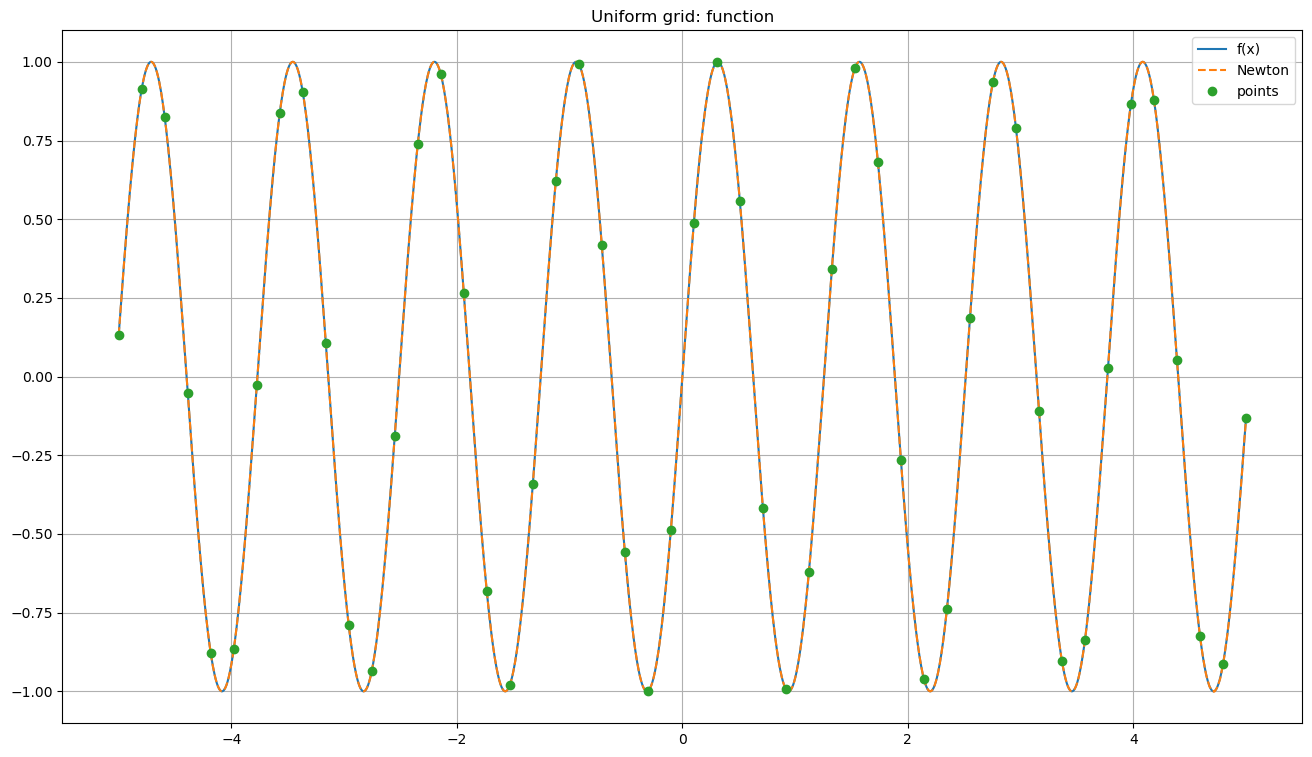

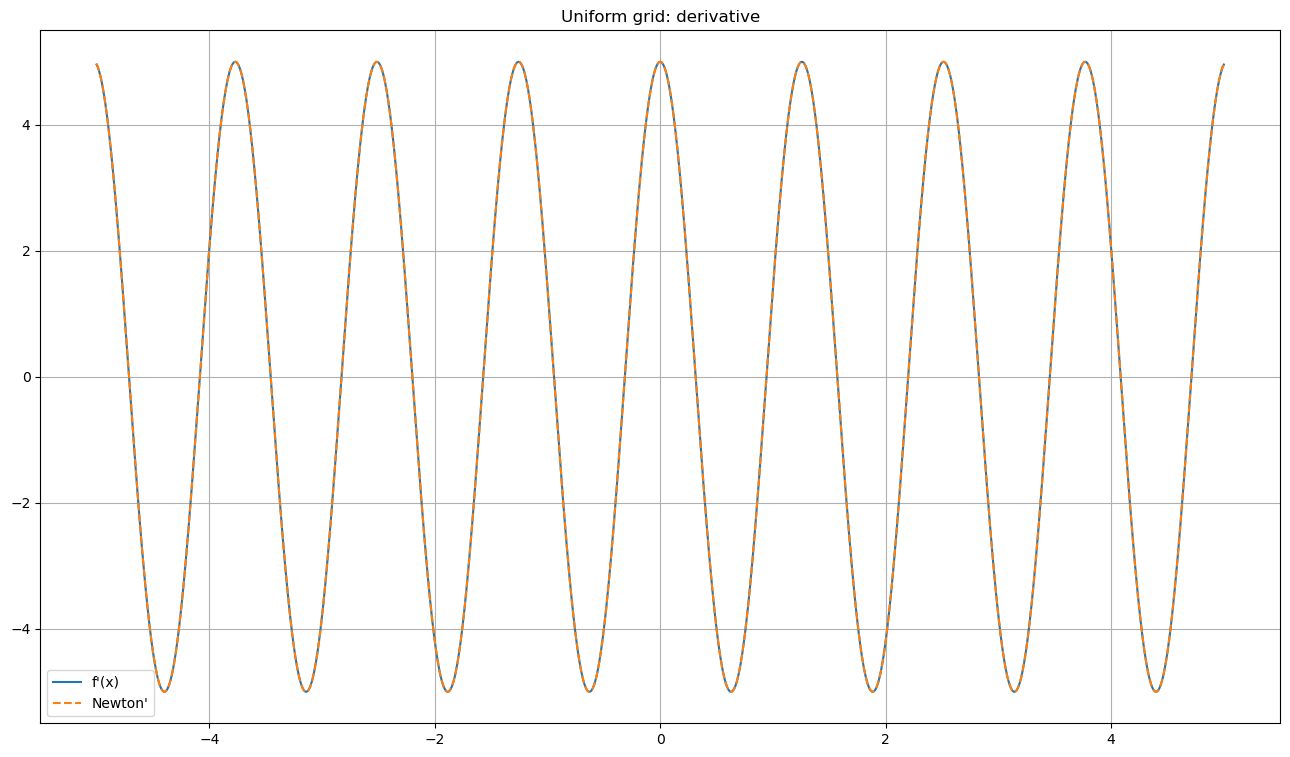

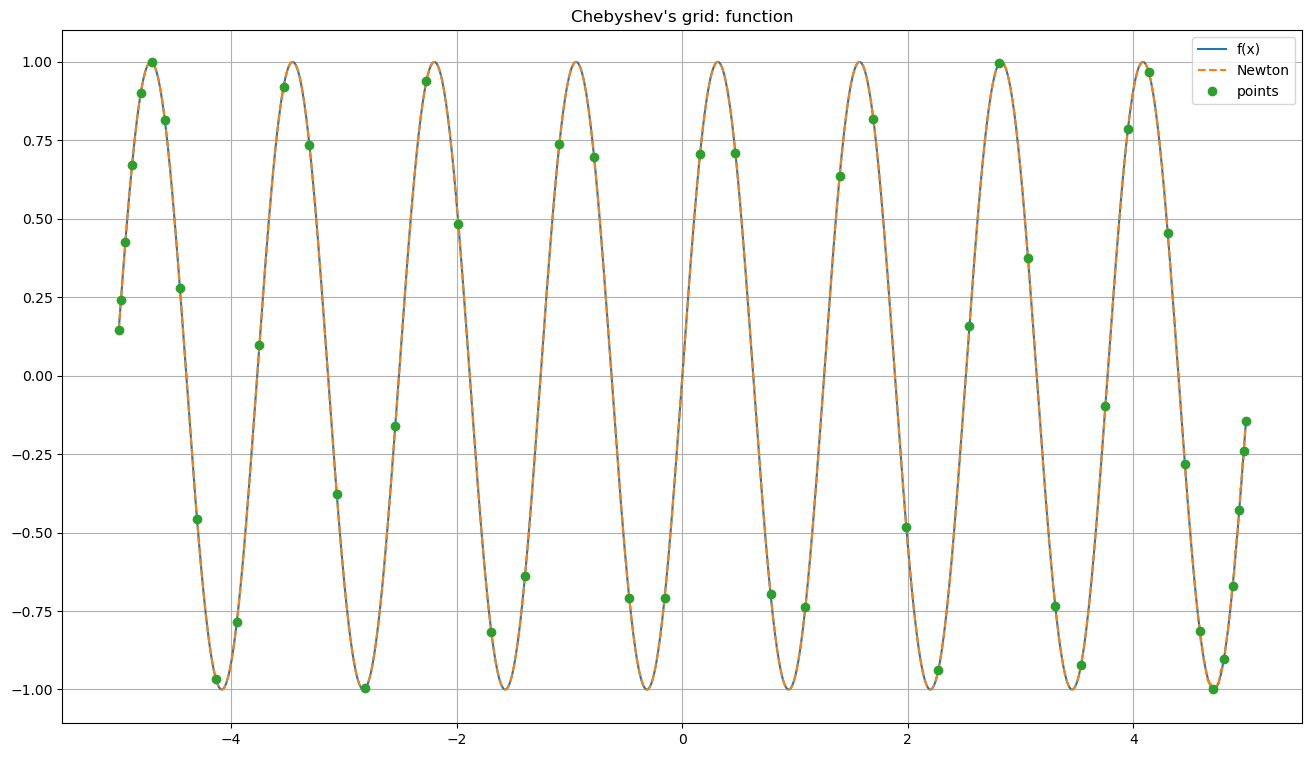

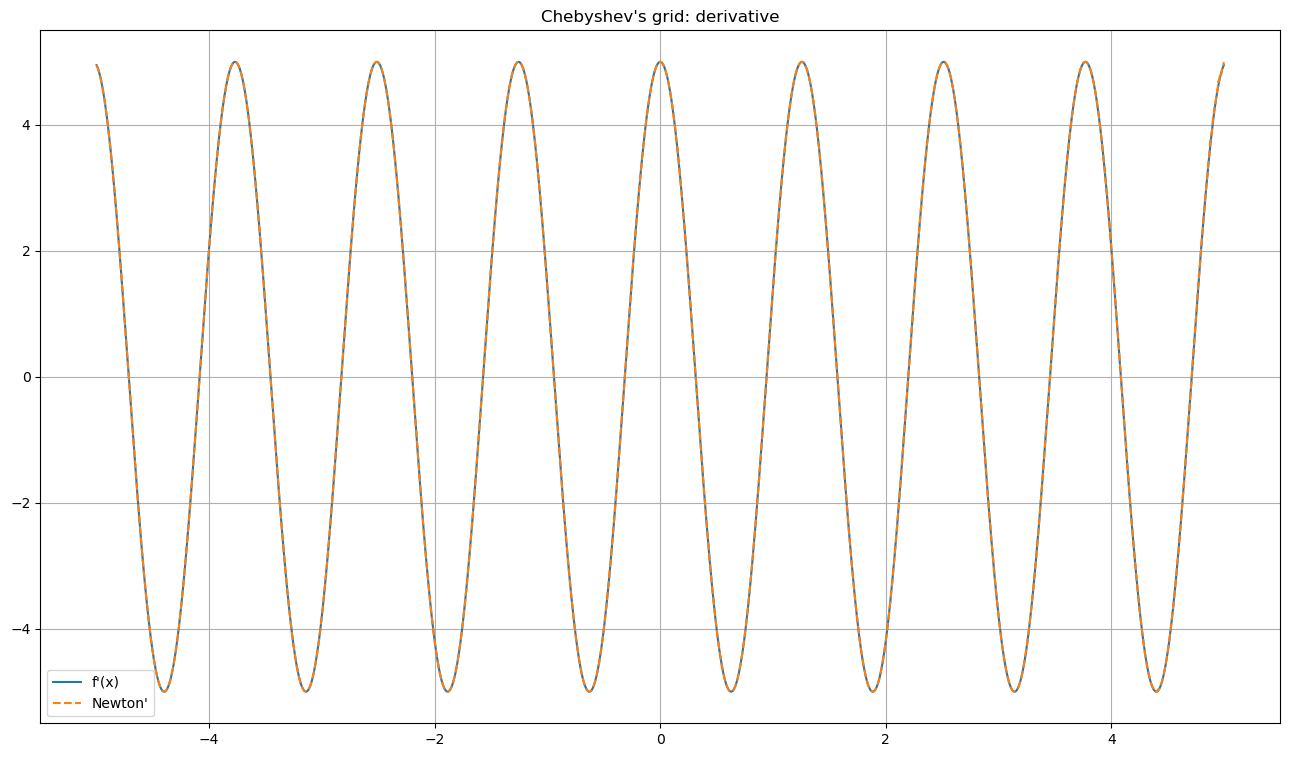

In [22]:
f = lambda x: np.sin(5 * x)
fp = lambda x: 5 * np.cos(5 * x)

n = 50
x_uniform = np.linspace(-5, 5, n)
interpolate_and_plot(f, fp, x_uniform, "Uniform grid")

k = np.arange(1, n + 1)
x_cheb = 5 * np.cos((2 * k - 1) / (2 * n) * np.pi)
x_cheb = np.sort(x_cheb)
interpolate_and_plot(f, fp, x_cheb, "Chebyshev's grid")

plt.show()

# 4. Численное дифференцирование и интегрирование

## 4.1. Конечно-разностная формула на произвольном шаблоне

Написать программу для вычисления приближенного значения производной заданного порядка по значениям функции в заданных узлах.

Требования к программе:

1. Программа должна содержать функцию, принимающую на вход: массив координат узлов $x_1,\dots,x_n$, массив значений функции в узлах `f_1, ..., f_n`, порядок производной $k\ge1$ и точку $x_0$, в которой нужно вычислить значение производной.

2. Функция должна вычислять и возвращать коэффициенты конечно-разностной формулы и приближенное значение производной $f^{(k)}(x_0)$.

3. Программа должна содержать тестовый расчёт для гладкой функции: функция должна вызываться для последовательности наборов одного фиксированного количества узлов, так чтобы величина $x_i - x_0$ уменьшалась каждый раз вдвое. Программа должна строить график зависимости ошибки от шага $h = \max_i|x_i - x_0|$ в логарифмической шкале. На этом же графике нужно нарисовать прямую с углом наклона, равным порядку аппроксимации.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial


def fd_coefficients(x, x0, k):
    n = len(x)
    A = np.zeros((n, n))
    for j in range(n):
        A[j, :] = [(xi - x0) ** j / factorial(j) for xi in x]

    b = np.zeros(n)
    b[k] = 1
    a = np.linalg.solve(A, b)
    return a


def fd_approx(x, fvals, x0, k):
    a = fd_coefficients(x, x0, k)
    return a, np.dot(a, fvals)

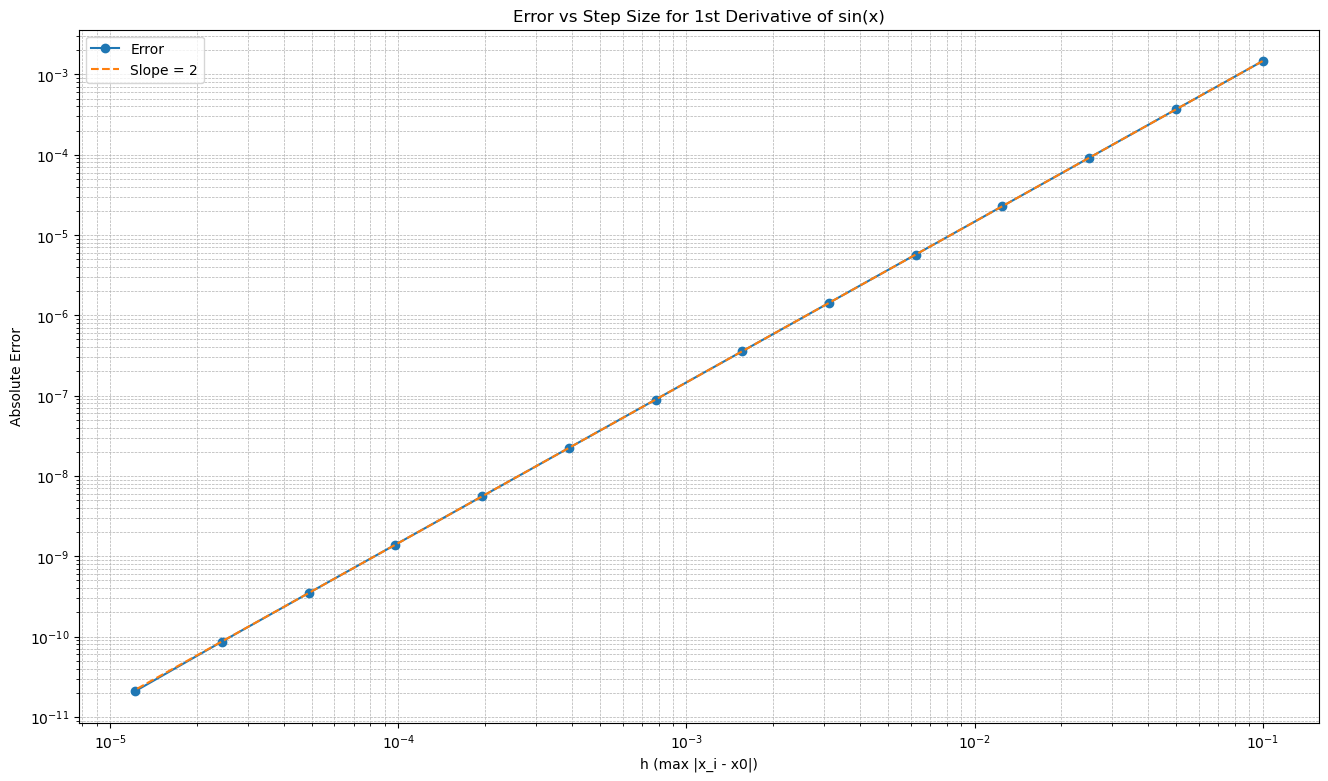

In [12]:
x0 = 0.5
k = 1

offsets = np.array([-1, 0, 1])
n_nodes = len(offsets)

num_tests = 14
h0 = 0.1

step_sizes = []
errors = []

for m in range(num_tests):
    h = h0 / (2 ** m)
    x = x0 + offsets * h
    fvals = np.sin(x)
    coeffs, approx = fd_approx(x, fvals, x0, k)
    error = abs(approx - np.cos(x0))

    step_sizes.append(max(abs(x - x0)))
    errors.append(error)

p = n_nodes - k
ref_line = [errors[0] * (h / step_sizes[0]) ** p for h in step_sizes]

# Plotting
plt.figure(figsize=(16, 9))
plt.loglog(step_sizes, errors, 'o-', label='Error')
plt.loglog(step_sizes, ref_line, '--', label=f'Slope = {p}')
plt.xlabel('h (max |x_i - x0|)')
plt.ylabel('Absolute Error')
plt.title('Error vs Step Size for 1st Derivative of sin(x)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# 5. Численное решение ОДУ

## 5.1. Решение нелинейной краевой задачи

Написать программу для численного решения краевой задачи:
$$
u''(x) = u\bigl(2x^2 - 2\ln u - 2\bigr),\quad u(0)=1,\;u(1)=1/e
$$
с помощью конечно-разностного метода 2-го порядка.

Требования к программе:

1. Программа должна содержать функцию, которая принимает на вход количество узлов и порог точности для остановки итераций в методе Ньютона и возвращает массив значений решения в узлах сетки и координаты узлов сетки.

2. Функция должна решать нелинейную систему уравнений, полученную после конечно-разностной аппроксимации исходной задачи методом Ньютона.

3. Для решения линейной системы на каждой итерации нужно использовать либо готовую, либо собственную функцию для решения трёхдиагональной системы.

4. Программа должна запускать расчёт для сгущающихся равномерных сеток (шаг уменьшается вдвое) и строить в логарифмической шкале график зависимости ошибки от величины шага $h$. За условно точное решение взять численное решение на очень подробной сетке. График должен показывать, что порядок аппроксимации равен 2.

5. Программа должна выводить графики численного и точного решения для тестовой задачи.

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def solve_tridiagonal(a, b, c, d):
    n = len(d)
    cp = np.empty(n - 1)
    dp = np.empty(n)
    x = np.empty(n)

    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n - 1):
        denom = b[i] - a[i] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i] * dp[i - 1]) / denom
    dp[n - 1] = (d[n - 1] - a[n - 1] * dp[n - 2]) / (b[n - 1] - a[n - 1] * cp[n - 2])

    x[n - 1] = dp[n - 1]
    for i in reversed(range(n - 1)):
        x[i] = dp[i] - cp[i] * x[i + 1]
    return x


def solve_bvp(m, tol, max_iter=50):
    a = 1.0
    b = 1 / np.e
    h = 1 / (m + 1)
    x = np.linspace(0, 1, m + 2)

    U = a + (b - a) * x
    U_int = U[1:-1].copy()

    for _ in range(max_iter):
        G = np.zeros(m)
        lower = np.full(m, 1 / h ** 2)
        upper = np.full(m, 1 / h ** 2)
        diag = np.zeros(m)
        for j in range(m):
            xi = x[j + 1]
            Uj = U_int[j]
            Um = U_int[j - 1] if j > 0 else a
            Up = U_int[j + 1] if j < m - 1 else b

            phi = 2 * xi ** 2 - 2 * np.log(Uj) - 2
            G[j] = (Um - 2 * Uj + Up) / h ** 2 - Uj * phi
            diag[j] = -2 / h ** 2 - phi + 2

        lower[0] = 0
        upper[-1] = 0

        delta = solve_tridiagonal(lower, diag, upper, G)
        U_int_new = U_int - delta

        if np.linalg.norm(delta, np.inf) < tol:
            U_int = U_int_new
            break
        U_int = U_int_new

    U[1:-1] = U_int
    return x, U

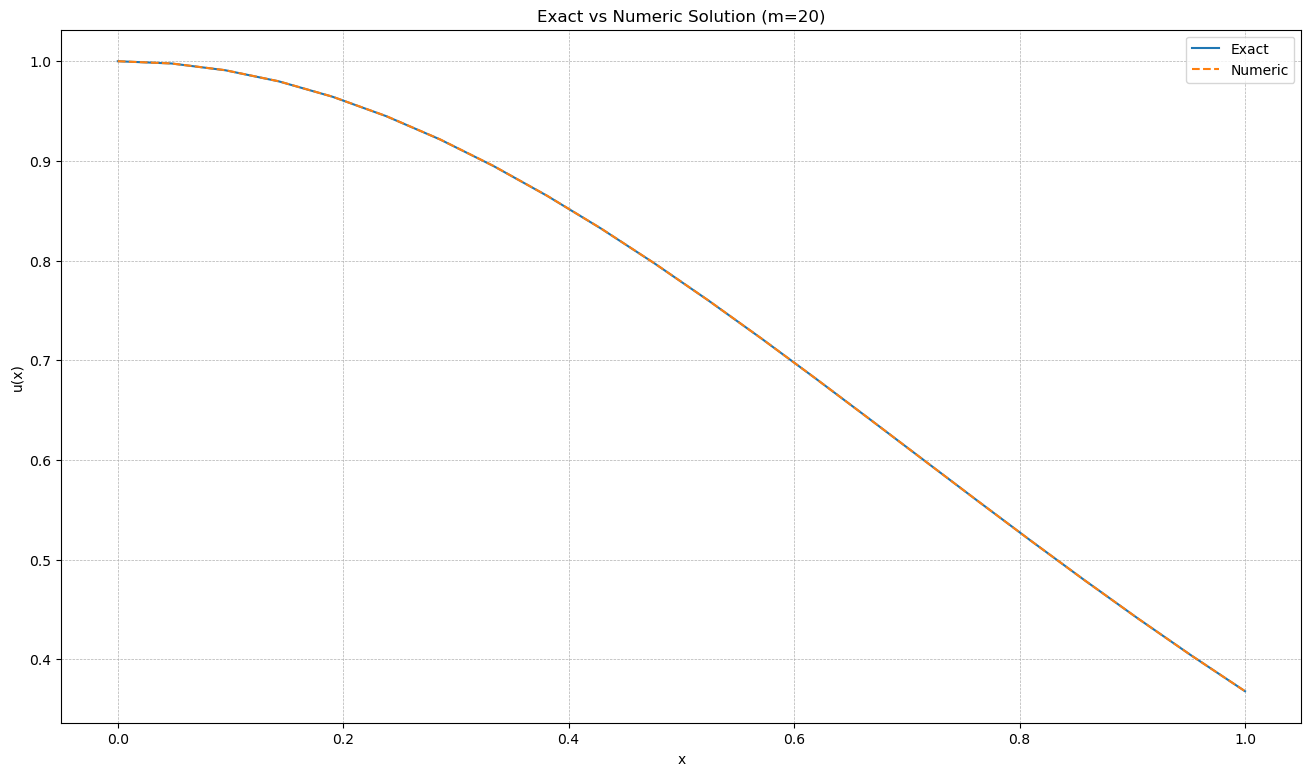

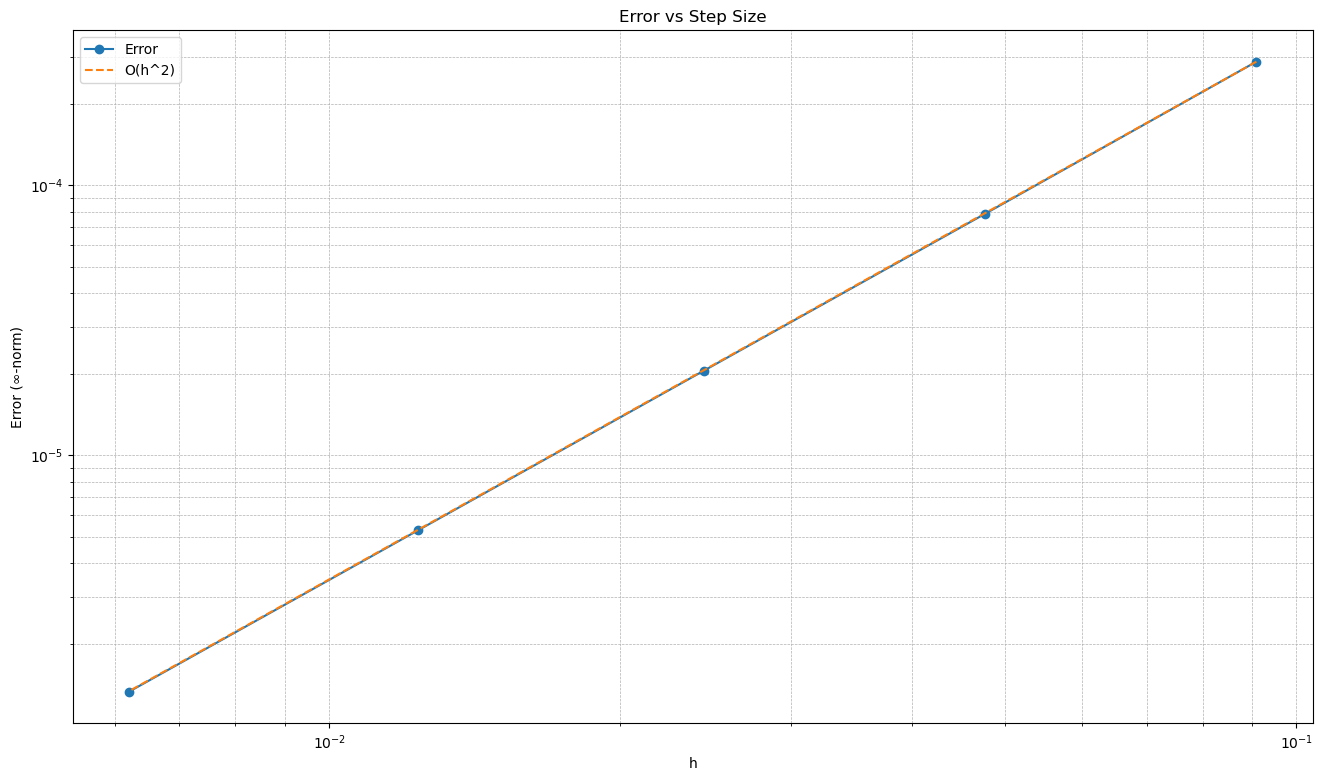

In [14]:
m_test = 20
tol = 1e-9
x_test, U_test = solve_bvp(m_test, tol)
U_exact_test = np.exp(-x_test ** 2)

plt.figure(figsize=(16, 9))
plt.plot(x_test, U_exact_test, label='Exact')
plt.plot(x_test, U_test, '--', label='Numeric')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title(f'Exact vs Numeric Solution (m={m_test})')

m_list = [10, 20, 40, 80, 160]
hs = []
errors = []
for m in m_list:
    x_m, U_m = solve_bvp(m, tol)
    err = np.max(np.abs(U_m - np.exp(-x_m ** 2)))
    hs.append(1 / (m + 1))
    errors.append(err)

plt.figure(figsize=(16, 9))
plt.loglog(hs, errors, 'o-', label='Error')
# Reference slope 2 line
C = errors[0] / hs[0] ** 2
ref_line = C * np.array(hs) ** 2
plt.loglog(hs, ref_line, '--', label='O(h^2)')
plt.xlabel('h')
plt.ylabel('Error (∞-norm)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Error vs Step Size')

plt.show()